In [22]:
! pip install TitanicClassifierCLI==0.2

# Imports

In [23]:

# Import necessary libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import the TitanicClassifierCLI package
from TitanicClassifierCLI.data_processor import DataProcessor
from TitanicClassifierCLI.model_trainer import ModelTrainer
from TitanicClassifierCLI.evaluator import Evaluator



# Exploratory analysis

loading data
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2024-07-08 11:32:51,682 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-08 11:32:51,687 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


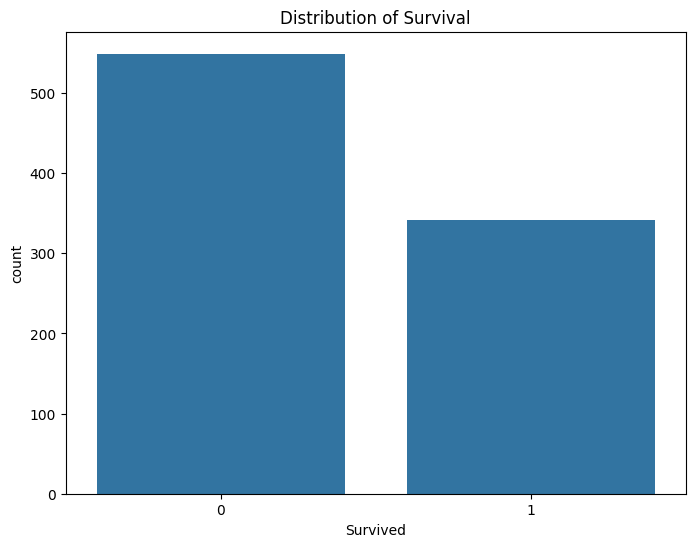

In [24]:
# Load the training data
train_data_path = '../Data/train.csv'
data_processor = DataProcessor(train_data_path)
train_data = data_processor.load_data()

# Display basic information about the dataset
print("Dataset Information:")
train_data.info()

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
display(train_data.head())

# Display summary statistics
print("\nSummary Statistics:")
display(train_data.describe())

# Visualize the distribution of the target variable (Survived)
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survival')
plt.show()


# Data Preprocessing

In [25]:
# Preprocess the data
X, y = data_processor.preprocess()

print("Shape of preprocessed features:", X.shape)
print("Shape of target variable:", y.shape)

# Display feature names after preprocessing
feature_names = data_processor.get_feature_names()
print("\nFeature names after preprocessing:")
print(feature_names)

Starting preprocessing...
Data shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Starting feature engineering...
Feature engineering completed.
Columns after feature engineering: Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone'],
      dtype='object')
Processing training data...
Preprocessing completed successfully.
Shape of preprocessed features: (891, 16)
Shape of target variable: (891,)

Feature names after preprocessing:
['num__Age' 'num__Fare' 'num__FamilySize' 'cat__Pclass_1' 'cat__Pclass_2'
 'cat__Pclass_3' 'cat__Sex_female' 'cat__Sex_male' 'cat__Embarked_C'
 'cat__Embarked_Q' 'cat__Embarked_S' 'cat__Title_Master' 'cat__Title_Miss'
 'cat__Title_Mr' 'cat__Title_Mrs' 'cat__Title_Rare']


# Train the model

In [26]:
# Initialize and train the model
model_trainer = ModelTrainer()
model_trainer.train(X, y)

print("Model training completed.")

Model training completed.


# Evaluate the model

Accuracy: 0.8552
Precision: 0.8564
Recall: 0.8552
F1 Score: 0.8525

Model Evaluation Results:
Accuracy: 0.8552
Precision: 0.8564
Recall: 0.8552
F1: 0.8525


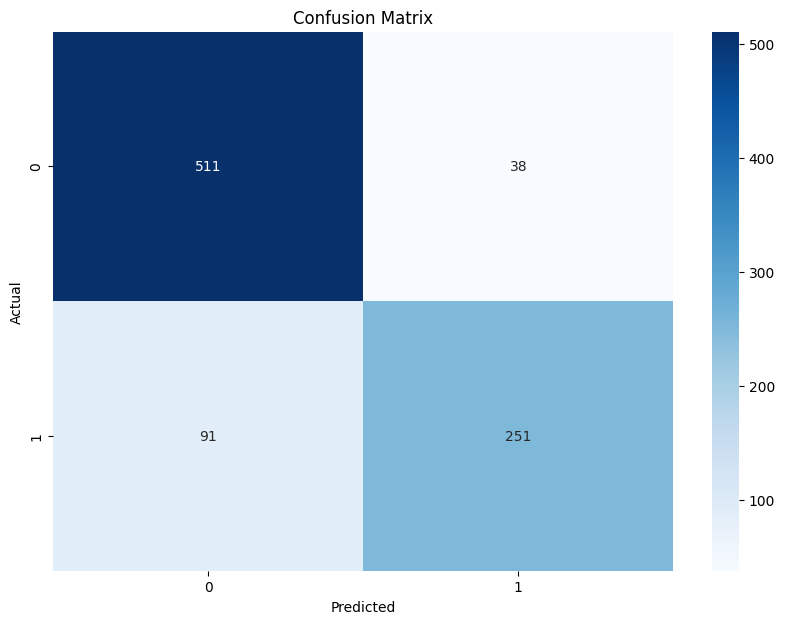

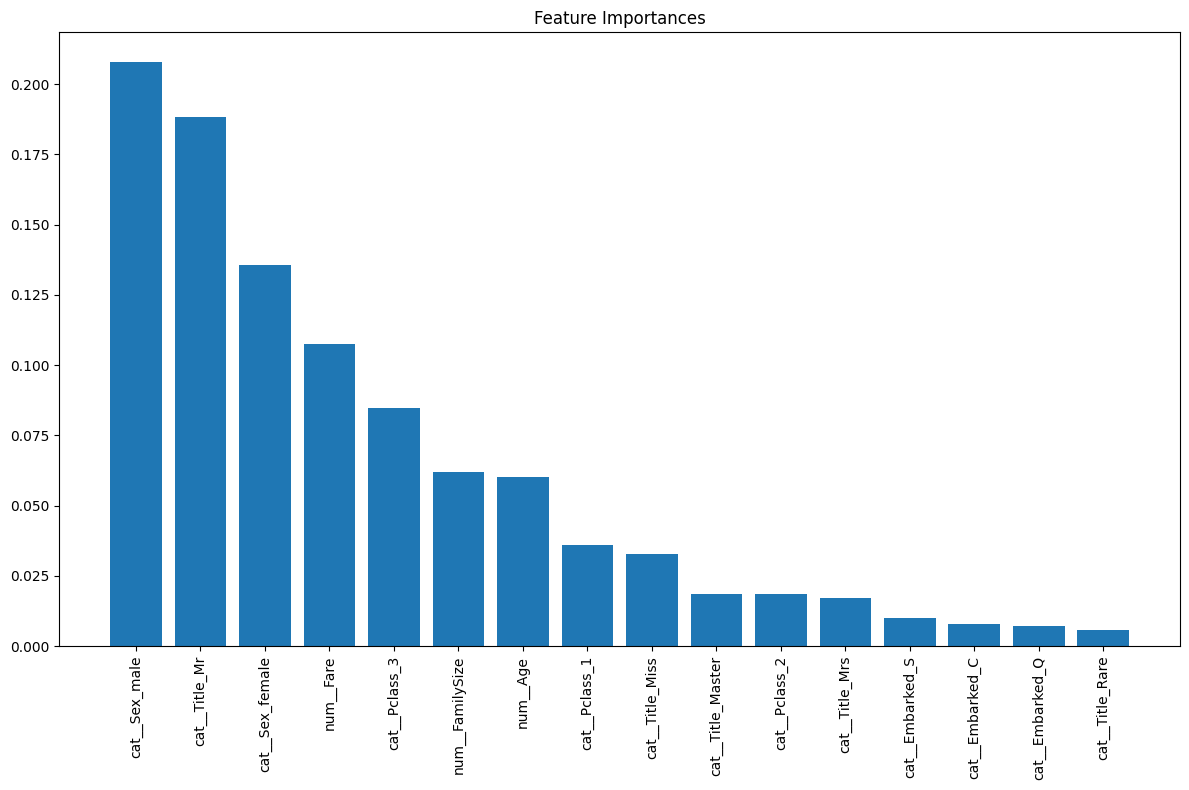

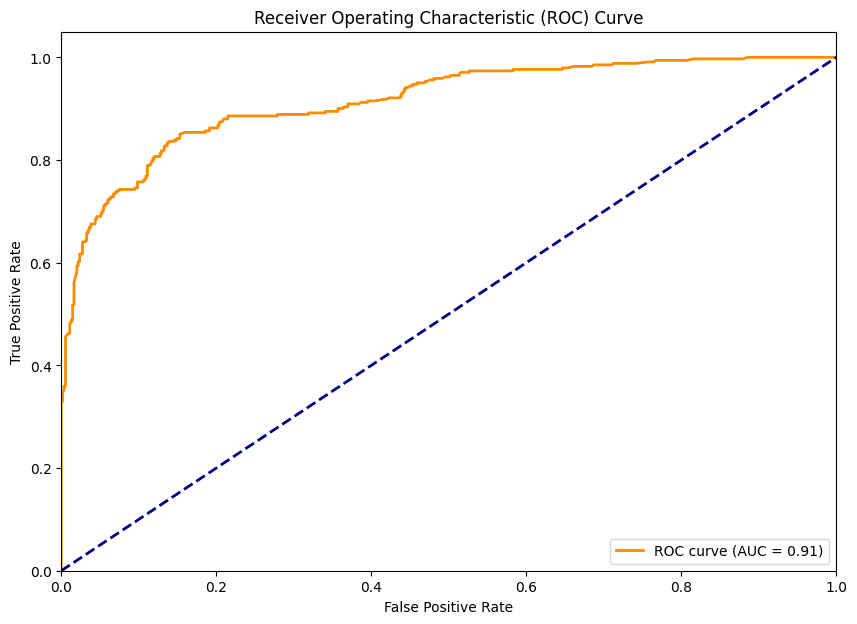

In [27]:
# Evaluate the model
evaluator = Evaluator(model_trainer.model)
evaluation_results = evaluator.evaluate(X, y)

print("\nModel Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

# Plot confusion matrix
evaluator.plot_confusion_matrix(y, model_trainer.predict(X))

# Plot feature importances
evaluator.plot_importances(feature_names)

# Plot ROC curve
evaluator.plot_roc_curve(X, y)

# Predictions on the test set

In [28]:
# Load and preprocess the test data
test_data_path = '../Data/test.csv'
test_processor = DataProcessor(test_data_path)
test_data = test_processor.load_data()
test_processor.fitted_preprocessor = data_processor.get_fitted_preprocessor()
X_test = test_processor.preprocess()

# Make predictions
predictions = model_trainer.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_processor.get_passenger_ids(),
    'Survived': predictions
})

# Save submission file
submission_path = 'submission.csv'
submission.to_csv(submission_path, index=False)
print(f"Submission file saved to {submission_path}")

# Display the first few rows of the submission file
display(submission.head())

loading data
Starting preprocessing...
Data shape: (418, 11)
Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Starting feature engineering...
Feature engineering completed.
Columns after feature engineering: Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize',
       'IsAlone'],
      dtype='object')
Processing test data...
Preprocessing completed successfully.
Submission file saved to submission.csv


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Conclusion

In [29]:
print("Titanic Survival Prediction Analysis Completed")
print("Key Findings:")
print(f"- Model Accuracy: {evaluation_results['accuracy']:.4f}")
print(f"- Top 3 Important Features: {', '.join(feature_names[model_trainer.model.feature_importances_.argsort()[-3:]])}")
print(f"- Submission file created with {len(predictions)} predictions")

Titanic Survival Prediction Analysis Completed
Key Findings:
- Model Accuracy: 0.8552
- Top 3 Important Features: cat__Sex_female, cat__Title_Mr, cat__Sex_male
- Submission file created with 418 predictions


# Análisis de Resultados

Al evaluar el modelo de clasificación para predecir la supervivencia de pasajeros del Titanic, tenemos las siguientes métricas:

- **Exactitud (Accuracy):** 0.8552
- **Precisión (Precision):** 0.8564
- **Recuperación (Recall):** 0.8552
- **Puntuación F1 (F1 Score):** 0.8525

## Evaluación del Modelo

### Rendimiento General
El modelo muestra un rendimiento sobresaliente, con todas las métricas superando el 85%. 

### Equilibrio entre Métricas
Las métricas son consistentemente altas y muy cercanas entre sí, lo que sugiere un modelo equilibrado que no sacrifica un aspecto del rendimiento por otro.

## Interpretación de Métricas

- **Exactitud de 0.8552:** Indica que el modelo clasificó correctamente al 85.52% de los pasajeros.
- **Precisión de 0.8564:** Sugiere que cuando el modelo predice que un pasajero sobrevivió, acierta el 85.64% de las veces.
- **Recuperación de 0.8552:** Implica que el modelo identifica correctamente el 85.52% de los supervivientes reales.
- **Puntuación F1 de 0.8525:** Siendo la media armónica entre precisión y recuperación, confirma el buen equilibrio del modelo.

## Evaluación Global
Considerando el contexto del problema y la complejidad de predecir la supervivencia basándose en datos limitados, podemos concluir que este es un buen modelo.

## Caracteristicas mas importantes

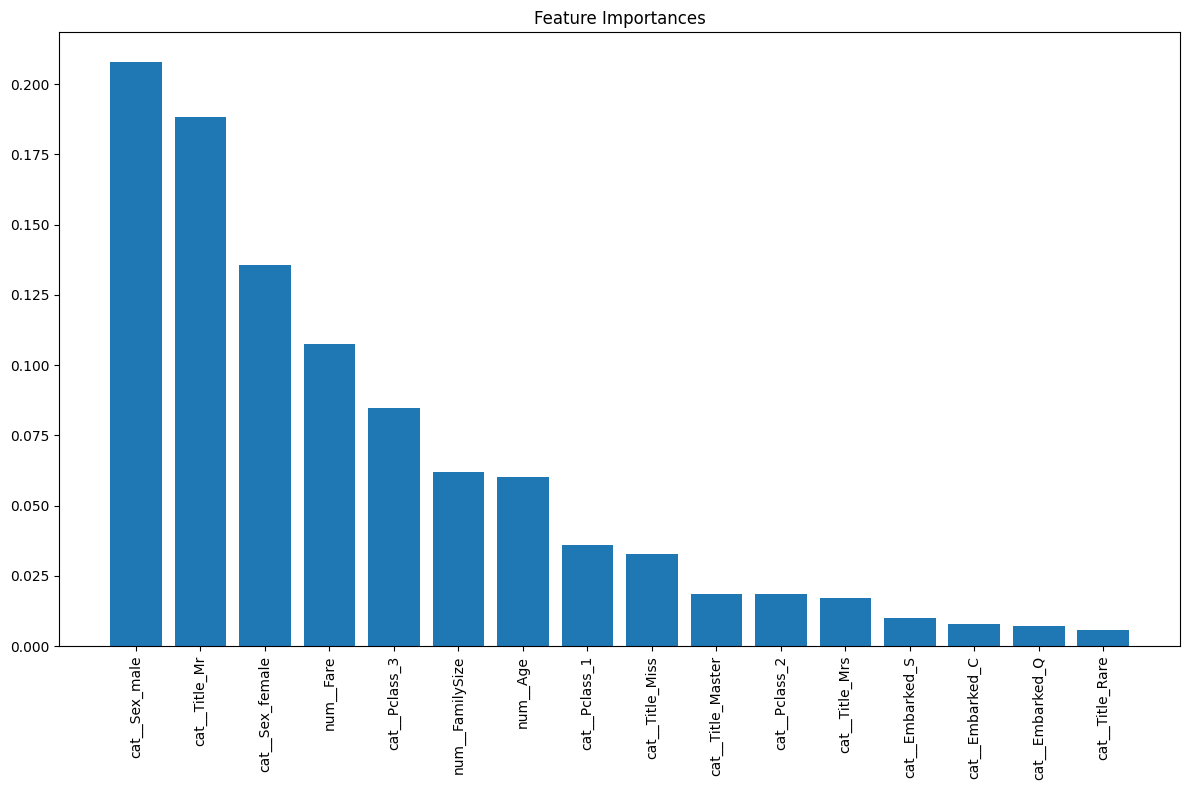


- Pclass: Representa la clase del pasajero (1ª, 2ª o 3ª), lo cual está relacionado con el estatus socioeconómico.
- Sex: El género fue un factor significativo en la supervivencia.
- Age: Los niños y jóvenes tenían mayores probabilidades de sobrevivir.
- Fare: El precio del boleto, indicador del estatus económico.


## Pasos para implementar en produccion

### Creación del archivo de workflow de github actions
1. Crear un archivo en el directorio `.github/workflows/`
2. Definir el workflow (pruebas, análisis de código y construcción de la imagen Docker)

### Preparación de AWS

1. Crear un repositorio en Amazon ECR para almacenar las imágenes Docker.

### Airflow para orquestación

1. Configurar Amazon Managed Workflows para Airflow (MWAA).
2. Crear un DAG en Airflow para el reentrenamiento periódico del modelo.

### Despliegue del modelo

1. Crear una definición de tarea para ECS Fargate.
2. Configurar un servicio ECS utilizando Fargate.
3. Actualizar el workflow de GitHub Actions para el despliegue en Fargate.

### Monitoreo 

1. Configurar Amazon CloudWatch para la recolección de logs de los contenedores.

### Retroalimentación y monitoreo

1. Implementar logging de predicciones para análisis posterior.
2. Configurar un pipeline de feedback para recopilar datos de rendimiento del modelo en producción.


## Trabajo futuro
Para una posible mejora de performance se podrian explorar los siguientes items:

- Experimentar con otras arquitecturas de regresor.
- Aplicar optimizacion de hiperparametros.
- Realizar una ingeniería de características más profunda.
- Recopilar datos adicionales si es posible.
